In [4]:
import os

In [1]:
### Import all dependencies ###

import anndata as ad
import matplotlib.pyplot as plt
import mudata as md
import muon
import scanpy as sc
import scvi
import numpy as np
import pandas as pd
import csv

C:\Python311\Lib\site-packages\scvi\_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
C:\Python311\Lib\site-packages\scvi\_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [5]:
os.getcwd()

'C:\\Users\\satra\\Documents\\uOttawa\\Semester 5.1\\CSI 4900'

In [3]:
%%capture [--no-display]

adataTH1 = muon.read_10x_h5("D:/genomics/data/updated/raw_data/TH1/filtered_feature_bc_matrix.h5")
adataTH1.var_names_make_unique()

adataTH2 = muon.read_10x_h5("D:/genomics/data/updated/raw_data/TH2/filtered_feature_bc_matrix.h5")
adataTH2.var_names_make_unique()

# adataBM1 = muon.read_10x_h5("./data/updated/raw_data/BM1/filtered_feature_bc_matrix.h5")
# adataBM1.var_names_make_unique()
# adataBM2 = muon.read_10x_h5("./data/updated/raw_data/BM2/filtered_feature_bc_matrix.h5")
# adataBM2.var_names_make_unique()
# adataBM3 = muon.read_10x_h5("./data/updated/raw_data/BM3/filtered_feature_bc_matrix.h5")
# adataBM3.var_names_make_unique()

adataBM4 = muon.read_10x_h5("D:/genomics/data/updated/raw_data/BM4/filtered_feature_bc_matrix.h5")
adataBM4.var_names_make_unique()

# adataPB1 = muon.read_10x_h5("/Users/stur/Workspace/Human/PB1-05H183-TLX1-M/outs/filtered_feature_bc_matrix.h5")
# adataPB1.var_names_make_unique()

adataPB2 = muon.read_10x_h5("D:/genomics/data/updated/raw_data/PB2/filtered_feature_bc_matrix.h5")
adataPB2.var_names_make_unique()

In [4]:
adataTH1.mod['rna']

AnnData object with n_obs × n_vars = 5064 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [5]:
# print(adataTH1.mod['rna'].X[0,:])

In [9]:
adataTH1.mod['rna']

AnnData object with n_obs × n_vars = 5064 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [6]:
sparse_array = adataTH1.mod['rna'].X.toarray()
type(sparse_array)

numpy.ndarray

In [10]:
rows, cols = len(sparse_array), len(sparse_array[0])
rows, cols

(5064, 36601)

In [11]:
sparse_nonzero = np.nonzero(sparse_array)

In [78]:
sparse_nonzero

(array([   0,    0,    0, ..., 5063, 5063, 5063], dtype=int64),
 array([   62,    70,    77, ..., 36569, 36571, 36580], dtype=int64))

In [76]:
len(sparse_nonzero[0])

14181674

In [32]:
# tsv_file = 'test_output.tsv'
# columns = ['row', 'column', 'value']

# with open("test_output.csv", "w", newline='') as file:
#     writer = csv.writer(file, delimiter='\t')
#     writer.writerow(columns)

#     for i, row in enumerate(b):
#         for j, value in enumerate(row):
#             if value != 0:
#                 writer.writerow([i, j, value])

In [77]:
nonzero_count = np.count_nonzero(sparse_array)

In [96]:
mtx_file = './data/TH1_test/matrix.mtx'
with open(mtx_file, 'w') as file:
    file.write("%%MatrixMarket matrix coordinate real general\n")

    # Write dimensions
    rows, cols = len(sparse_array), len(sparse_array[0])
    file.write(f"{cols} {rows} {np.count_nonzero(sparse_array)}\n")

    for i in range(nonzero_count):
        col = sparse_nonzero[1][i]
        row = sparse_nonzero[0][i]
        
        file.write(f"{col+1} {row+1} {sparse_array[row][col]}\n")

In [39]:
adataTH1.obs.to_csv('./data/TH1_test/barcodes.tsv', sep="\t", header=False)

In [95]:
adataTH1.obs

""
AAACCCACAGCTTTCC-1_TH1
AAACCCAGTAAGATTG-1_TH1
AAACCCATCTGTCCCA-1_TH1
AAACGAAAGACCTCCG-1_TH1
AAACGAAAGGACAACC-1_TH1
...
TTTGTTGAGGGTACAC-1_TH1
TTTGTTGCAACCGACC-1_TH1
TTTGTTGCATCCTATT-1_TH1
TTTGTTGCATCGGAGA-1_TH1


In [112]:
# adataTH1.mod['rna'].var.to_csv('./data/TH1_test/features.tsv', sep="\t", header=False)

In [7]:
type(adataTH1.mod['rna'].var)

pandas.core.frame.DataFrame

In [25]:
adataTH1.mod['rna'].var

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38
AC023491.2,ENSG00000278633,Gene Expression,GRCh38
AC007325.1,ENSG00000276017,Gene Expression,GRCh38
AC007325.4,ENSG00000278817,Gene Expression,GRCh38


In [22]:
TH1_vars = adataTH1.mod['rna'].var.reset_index()[["gene_ids", "index", "feature_types"]]
TH1_vars

,gene_ids,index,feature_types
0,ENSG00000243485,MIR1302-2HG,Gene Expression
1,ENSG00000237613,FAM138A,Gene Expression
2,ENSG00000186092,OR4F5,Gene Expression
3,ENSG00000238009,AL627309.1,Gene Expression
4,ENSG00000239945,AL627309.3,Gene Expression
...,...,...,...
36596,ENSG00000277836,AC141272.1,Gene Expression
36597,ENSG00000278633,AC023491.2,Gene Expression
36598,ENSG00000276017,AC007325.1,Gene Expression
36599,ENSG00000278817,AC007325.4,Gene Expression


In [19]:
adataTH1.mod['rna'].var

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38
AC023491.2,ENSG00000278633,Gene Expression,GRCh38
AC007325.1,ENSG00000276017,Gene Expression,GRCh38
AC007325.4,ENSG00000278817,Gene Expression,GRCh38


In [24]:
TH1_vars.to_csv('./data/TH1_test/features.tsv', sep="\t", header=False, index=False)

In [107]:
adataTH1.var[adataTH1.var['feature_types'] == "Gene Expression"]

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38
AC023491.2,ENSG00000278633,Gene Expression,GRCh38
AC007325.1,ENSG00000276017,Gene Expression,GRCh38
AC007325.4,ENSG00000278817,Gene Expression,GRCh38


In [108]:
adataTH1.var[adataTH1.var['feature_types'] == "Antibody Capture"]

,gene_ids,feature_types,genome
ADT.anti.hu.CD86,ADT.anti.hu.CD86,Antibody Capture,
ADT.anti.hu.CD274..B7.H1.PD.L1.,ADT.anti.hu.CD274..B7.H1.PD.L1.,Antibody Capture,
ADT.anti.hu.CD270..HVEM.TR2.,ADT.anti.hu.CD270..HVEM.TR2.,Antibody Capture,
ADT.anti.hu.CD155..PVR.,ADT.anti.hu.CD155..PVR.,Antibody Capture,
ADT.anti.hu.CD112..Nectin.2.,ADT.anti.hu.CD112..Nectin.2.,Antibody Capture,
...,...,...,...
SPK.anti.hu.CD184..CXCR4.,SPK.anti.hu.CD184..CXCR4.,Antibody Capture,
SPK.anti.hu.Notch.1,SPK.anti.hu.Notch.1,Antibody Capture,
SPK.anti.hu.CD135..Flt.3.Flk.2.,SPK.anti.hu.CD135..Flt.3.Flk.2.,Antibody Capture,
SPK.anti.hu.CD14,SPK.anti.hu.CD14,Antibody Capture,


In [104]:
adataTH1.var[adataTH1.var['genome'] != ""]

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38
AC023491.2,ENSG00000278633,Gene Expression,GRCh38
AC007325.1,ENSG00000276017,Gene Expression,GRCh38
AC007325.4,ENSG00000278817,Gene Expression,GRCh38


In [15]:
adataTH1.mod['rna']

AnnData object with n_obs × n_vars = 5064 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [115]:
### Annotation of all the samples ###

adataTH1.obs.index = [name + '_TH1' for name in adataTH1.obs_names]
adataTH2.obs.index = [name + '_TH2' for name in adataTH2.obs_names]

# adataBM1.obs.index = [name + '_BM1' for name in adataBM1.obs_names]
# adataBM3.obs.index = [name + '_BM3' for name in adataBM3.obs_names]

adataBM4.obs.index = [name + '_BM4' for name in adataBM4.obs_names]

# adataPB1.obs.index = [name + '_PB1' for name in adataPB1.obs_names]

adataPB2.obs.index = [name + '_PB2' for name in adataPB2.obs_names]

In [121]:
### Merge all samples together ###

import pandas as pd
from scipy.sparse import vstack

# Concatenate obs
obs_merged = pd.concat([adataTH1.obs, adataTH2.obs, adataBM4.obs, adataPB2.obs])

# Concatenate X for each modality
rna_merged = vstack([adataTH1.mod['rna'].X, adataTH2.mod['rna'].X, adataBM4.mod['rna'].X, adataPB2.mod['rna'].X])
prot_merged = vstack([adataTH1.mod['prot'].X, adataTH2.mod['prot'].X, adataBM4.mod['prot'].X, adataPB2.mod['prot'].X])

# Get var for each modality
rna_var = adataTH1.mod['rna'].var
prot_var = adataTH1.mod['prot'].var

# Create new MuData object
adata_merged = md.MuData({'rna': ad.AnnData(X=rna_merged, var=rna_var), 'prot': ad.AnnData(X=prot_merged, var=prot_var)})
adata_merged.obs = obs_merged

adata=adata_merged
#adata=adataBM4

adata

MuData object with n_obs × n_vars = 22960 × 36755
  var:	'gene_ids', 'feature_types', 'genome'
  2 modalities
    rna:	22960 x 36601
      var:	'gene_ids', 'feature_types', 'genome'
    prot:	22960 x 154
      var:	'gene_ids', 'feature_types', 'genome'

**two subset of the object to deal with the rna modality and the prot modality separately**

In [120]:
### Extracting RNA data only ###

rna_adata = adata.mod['rna']
prot_adata = adata.mod['prot']

rna_adata.obs.index = adata.obs.index
prot_adata.obs.index = adata.obs.index

In [113]:
# rna_adata

In [83]:
## cleaning; not required by scevan

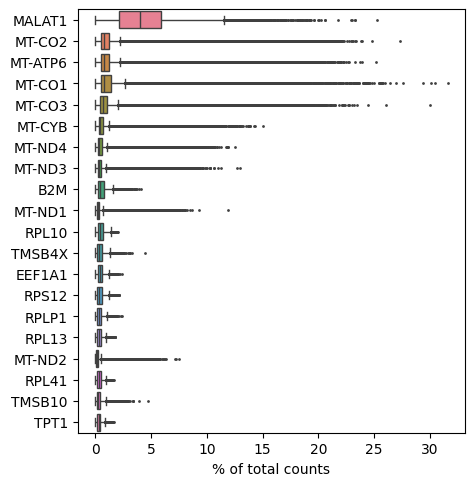

In [84]:
### Top ranking expressed gene ###
sc.pl.highest_expr_genes(rna_adata, n_top=20, )

C:\Python311\Lib\site-packages\scanpy\plotting\_anndata.py:795: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  g = sns.catplot(


AttributeError: 'NoneType' object has no attribute 'get_legend_handles_labels'

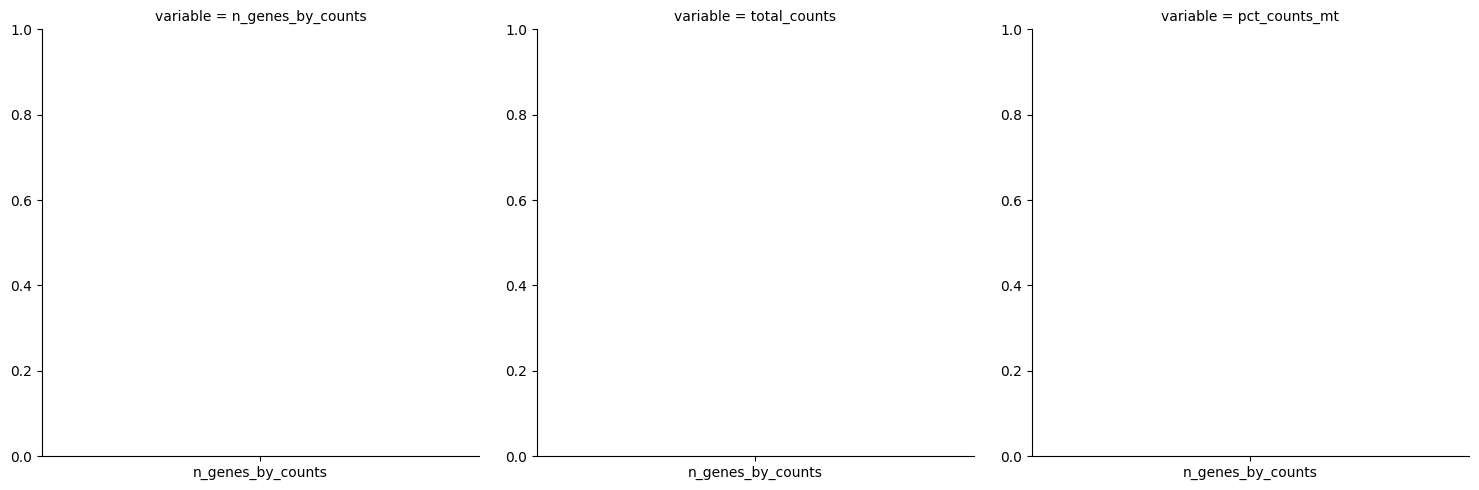

In [85]:
### Three plot summary BEFORE filtering ###

rna_adata.var['mt'] = rna_adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

rna_adata.var_names_make_unique()

sc.pl.violin(rna_adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

rna_adata

In [ ]:
### Summary of genes and counts BEFORE filtering ###

sc.pl.scatter(rna_adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(rna_adata, x='total_counts', y='n_genes_by_counts')

In [86]:
### Process to filtering steps ### NO FILTER STEPS SINCE WE ALREADY PROCESS TO CLEANING STEPS

sc.pp.filter_cells(rna_adata, min_genes=200)
sc.pp.filter_genes(rna_adata, min_cells=3)
rna_adata = rna_adata[rna_adata.obs.n_genes_by_counts < 5000, :]
rna_adata = rna_adata[rna_adata.obs.n_genes_by_counts > 350, :]
rna_adata = rna_adata[rna_adata.obs.pct_counts_mt < 40, :]

C:\Python311\Lib\site-packages\scanpy\plotting\_anndata.py:795: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  g = sns.catplot(


AttributeError: 'NoneType' object has no attribute 'get_legend_handles_labels'

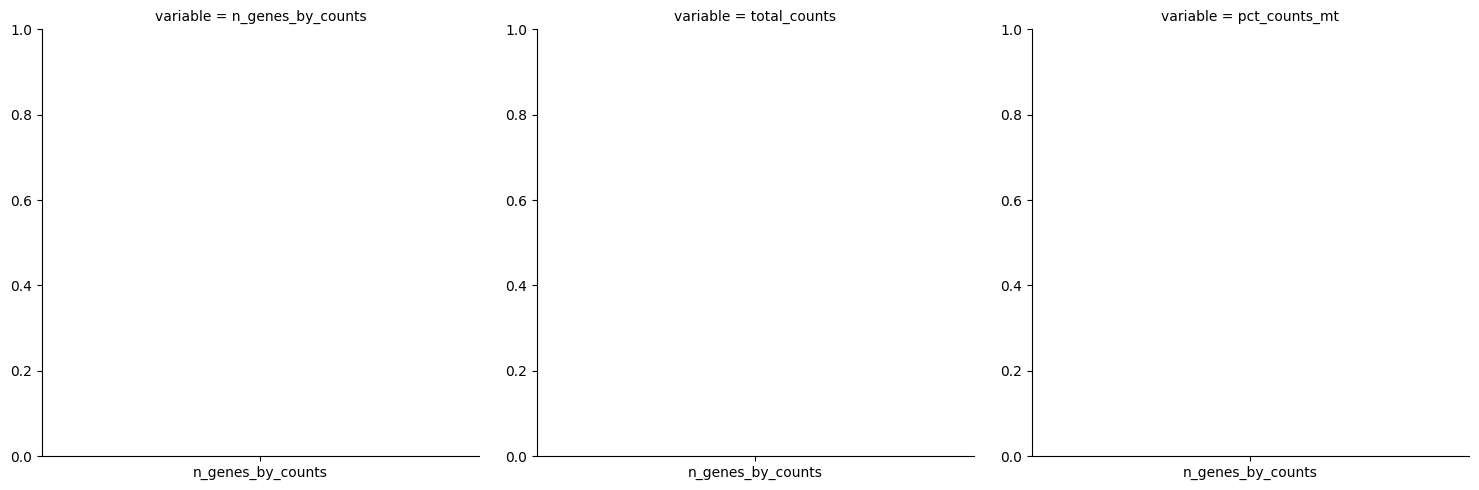

In [87]:
### Three plot summary AFTER filtering ###

sc.pl.violin(rna_adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

rna_adata

In [ ]:
### Summary of genes and counts AFTER filtering ###

sc.pl.scatter(rna_adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(rna_adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
### Top ranking expressed gene ###

sc.pl.highest_expr_genes(prot_adata, n_top=20, )

In [ ]:
### Three plot summary BEFORE filtering ###

prot_adata.var['mt'] = prot_adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(prot_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

prot_adata.var_names_make_unique()

sc.pl.violin(prot_adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

prot_adata

In [88]:
### Summary of genes and counts BEFORE filtering ###

sc.pl.scatter(prot_adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(prot_adata, x='total_counts', y='n_genes_by_counts')

ValueError: `x`, `y`, and potential `color` inputs must all come from either `.obs` or `.var`

In [118]:
# Assuming 'adata' is your AnnData object
adata.obs['Sample'] = [index.split('-1_')[1] for index in adata.obs.index]

In [124]:
# Extract the count matrix and convert it to a dense matrix
count_mtx = rna_adata.X.toarray()

In [126]:
# Transpose the count matrix to have genes on rows and cells on columns
df = pd.DataFrame(count_mtx.transpose(), index=rna_adata.var_names, columns=rna_adata.obs_names)

# Save the transposed DataFrame as a CSV file
df.to_csv("./data/output/SC_0_Umbrella_Clones.csv")